In [2]:
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn
import numpy as np
import itertools

ubuntu_path = '/home/arnab/Desktop/Thesis Ubuntu/'
windows_path = 'C:/Users/User/Desktop/Thesis_Windows/'

root_path = windows_path

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with little normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
with open(root_path + "Dataset_preprocessed/News_Papers/" +"motikontho_out_2.json") as f:
    fake_news = json.load(f)
print(type(fake_news) , len(fake_news))
print(fake_news[0])

<class 'list'> 1480
{'body': '৫ নম্ব নারী শিশু নির্যাতন দমন ট্রাইবুনাল আদাল মহিলা বিচারক তানজি ইসমাঈল গৃহকর্মী নির্যাতন মামলা ক্রিকে শাহাদত হোস স্ত্রী জেসমিন জাহান কুনো দুষ খু পা বেকসু খালাস দিয় কার্য চলা কাল শাহাদত নিচ ছ দেখাল গা হাত তু আল্লাহ কসম শুন জাতী দল খেলা ফাষ্ট বোলা আম বাসা আ চুক্তি হ বাসা বোলিং পেক সম হেলপ তার বেটসম বানান যা বেটসগার্ল এক তার বোলিং সম বাউন্সা দিছিলাম মতন খ বল গিয়া লাগ চুখ পাশ মাননী আদালত আপন হেলমেট পই বেটিং নাম সেই দুষ আপন বোলার বল বেটসমান গা লাগা কারন মামলা হই ইতিহাস দুনিয়া কুথা ইতি পুর্ব স্ত্রী মারধ যৌতু মামলায় কারাগার কণ্ঠশিল্পী আরফিন রুমি জামিন রা মহিলা বিচারক তানজি ইসমাঈল ফরিয়াদি পক্ষ পশ্ন আসামী পক্ষ বলত এক কথা আপনা দা করত শিশু মেয়ে মা হই গা গাত তোলা হই আপনাদ দা স কুনো ভিডু আছে… কথা শেষ মামলা ডিশম শিশু নির্যাতন মামলা মহিলা বিচারপতি রা বেকসু খালাস পা শাহাদত মা আপ পছন্দ প্রশ্ন উত্তর বল জানি না…হা হা হা সবচা বড় কথা স্মার্টনেস অন স্মার্টনেস জান মান পোশাকআশাক চালচলন হাইট ইম্পর্টেন্ট স্মার্টনেস হাইট লম্ দেখব সম গুজা কুঁজো হ হাঁট স্মার্ট হ দরকা ও আছে… প্লেয় স 

In [5]:
with open(root_path + "Dataset_preprocessed/News_Papers/" + "real_news.json") as f:
    real_news = json.load(f)
print(type(real_news) , len(real_news))
print(real_news[0])

<class 'list'> 1480
{'body': 'ইসরায়ে সেনা গাল চড় মার ফিলিস্তিন প্রতিবাদ প্রতীক হ ওঠা কারাগা ছাড়া পেয় আট মাস রোব কারাগা এক মুক্তি পান আহেদ মা এএফপি খবর তথ্য ১৭ বছর আহেদ মা সকাল ইসরায়াল শ্যারন কারাগা গাড়ি পশ্চিম তীর সীমান্তবর্তী তল্লাশি চৌকি পৌঁ আহাদ বাড়ি পশ্চিম তীর নবী সালেহ গ্রাম কারাগার মুখপাত্ আসাফ লিবরাতি ইসরায়ে সেনাদ হস্তান্ত স্বাগত জানা পরিবার সদস্য সমর্থক তল্লাশিচৌকি জড়ো হ বহনকারী সেনাবাহিনী গাড়ি দাঁড়ি পশ্চিম তীর যা সেনাদ মুক্তি পা রাস্ পাশ জড়ো হ হাজারো জন সাংবাদিকদ উদ্দাশ আহেদ সংবাদ সম্মেলন কথা আহাদ বা বাসেম এক হাত দি মা হা স্ত্রী রাখ পথ হাঁট চারপাশ স্বাধীন বাঁচ চা স্লোগান ওঠ ইসরায়ে কর্তৃপক্ষ গণমাধ্যম এড়ি এমন মামা তল্লাশি চৌ দি আ ধরন তথ্য দি প্রথম হ আহেদ মা পশ্চিম তীর ফিলিস্ শহ তুল্করাম শহর কা তল্লাশি চৌ দি আ তল্লাশি চৌ দি আ তিন তিন পরিবর্তন গত বছর শেষ মার্কিন প্রেসিডেন্ট ডোনাল্ড ট্রাম্প জেরুজালেম ইসরায়াল রাজধানী স্বীকৃতি দিল ক্ষোভ ফাট পড় ফিলিস্ মানুষ পবিত্ ভূমি জেরুজালেম রাজধানী হিসাব চা ফিলিস্তিনিদ প্রতিবাদ প্রতিবাদ থামা ইসরায়াল দমনপীড়ন মিলি সংঘা দাবানল ছড়ি পড় মধ্যপ্রাচ্য অঞ্চ

In [6]:
def tokenize_a_news(news):
    return news['body'].strip().split(' ')

news_arr = []
verdict = []
for news in fake_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('FAKE')
    
for news in real_news:
    token = tokenize_a_news(news)
    if(len(token) < 10):
        continue
    news_arr.append(news['body'])
    verdict.append('REAL')

print(len(news_arr) , len(verdict))

2853 2853


In [7]:
news_train, news_test, verdict_train, verdict_test = train_test_split(news_arr, verdict, test_size=0.33, random_state=53)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(news_train) 
count_test = count_vectorizer.transform(news_test)

print(count_train.shape , count_test.shape)

(1911, 6094) (942, 6094)


In [9]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(news_train) 
tfidf_test = tfidf_vectorizer.transform(news_test)

print(tfidf_train.shape , tfidf_test.shape)

(1911, 6090) (942, 6090)


In [10]:
print(tfidf_train[0])

  (0, 2190)	0.100092456438
  (0, 4135)	0.301257492176
  (0, 716)	0.287204913682
  (0, 468)	0.580953867021
  (0, 5169)	0.340689293319
  (0, 4194)	0.220458518786
  (0, 1428)	0.090696839432
  (0, 762)	0.290559033772
  (0, 547)	0.133639066775
  (0, 4231)	0.132529616333
  (0, 3116)	0.107221237677
  (0, 1791)	0.179069537745
  (0, 1978)	0.105482070789
  (0, 2789)	0.13700142562
  (0, 618)	0.0680398487931
  (0, 1982)	0.135825599874
  (0, 4734)	0.130501496153
  (0, 4702)	0.114651380866
  (0, 2779)	0.180972275173
  (0, 828)	0.0697227593455
  (0, 1556)	0.148869981677


In [11]:
type(tfidf_train.toarray())

numpy.ndarray

# TFIDF with RNN

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [13]:
le = LabelEncoder()

y_train = le.fit_transform(verdict_train)
y_test = le.transform(verdict_test)

In [28]:
max_words = 2000
max_len = 500
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(news_train)
sequences = tok.texts_to_sequences(news_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [29]:
test_sequences = tok.texts_to_sequences(news_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [30]:
(type(sequences) , len(sequences))

(list, 1911)

In [31]:
(type(sequences_matrix) , sequences_matrix.shape)

(numpy.ndarray, (1911, 500))

In [32]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [33]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 50)           100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [34]:
model.fit(sequences_matrix,y_train,batch_size=12,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 1528 samples, validate on 383 samples
Epoch 1/10
1528/1528 [==============================] - 234s 153ms/step - loss: 0.3237 - acc: 0.8541 - val_loss: 0.0868 - val_acc: 0.9687
Epoch 2/10
1528/1528 [==============================] - 237s 155ms/step - loss: 0.0999 - acc: 0.9764 - val_loss: 0.1007 - val_acc: 0.9713


In [35]:
scores = model.evaluate(test_sequences_matrix, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

942/942 [==============================] - 10s 10ms/step
Accuracy: 96.28%


942/942 [==============================] - 8s 9ms/step
(942,) (942,)
accuracy:   0.963
Confusion matrix, with little normalization


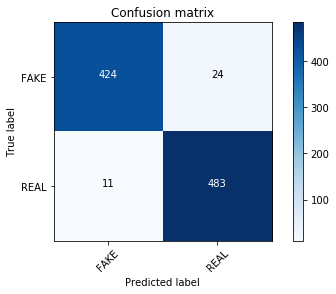

In [36]:
pred_test = model.predict(test_sequences_matrix , verbose=1)
pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    if(pred_test[i][0] < .5):
        pred[i] = 0
    else:
        pred[i] = 1
print(y_test.shape , pred.shape)
score = sklearn.metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = sklearn.metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])